In [1]:
from qiskit_ibm_runtime import QiskitRuntimeService
 
service = QiskitRuntimeService(channel="ibm_quantum", token="2b489eb39192a539ef08eaac9939800d6385c76cb00a82da55ae6d87999d3a0d6d76bcbf7a48ac35049d3039bad7988cad420225b06a15186785aa73019c02ac")
 

In [3]:
from qiskit import QuantumCircuit
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler
 
# Create empty circuit
example_circuit = QuantumCircuit(2)
example_circuit.measure_all()
 
# You'll need to specify the credentials when initializing QiskitRuntimeService, if they were not previously saved.
service = QiskitRuntimeService(channel="ibm_quantum", token="2b489eb39192a539ef08eaac9939800d6385c76cb00a82da55ae6d87999d3a0d6d76bcbf7a48ac35049d3039bad7988cad420225b06a15186785aa73019c02ac")
backend = service.least_busy(operational=True, simulator=False)
 
sampler = Sampler(backend)
job = sampler.run([example_circuit])
print(f"job id: {job.job_id()}")
result = job.result()
print(result)

job id: cwte4y3tdtng008762n0
PrimitiveResult([SamplerPubResult(data=DataBin(meas=BitArray(<shape=(), num_shots=4096, num_bits=2>)), metadata={'circuit_metadata': {}})], metadata={'execution': {'execution_spans': ExecutionSpans([SliceSpan(<start='2024-11-13 17:31:42', stop='2024-11-13 17:31:59', size=4096>)])}, 'version': 2})


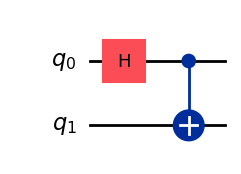

In [2]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import EstimatorV2 as Estimator
 
# Create a new circuit with two qubits
qc = QuantumCircuit(2)
 
# Add a Hadamard gate to qubit 0
qc.h(0)
 
# Perform a controlled-X gate on qubit 1, controlled by qubit 0
qc.cx(0, 1)
 
# Return a drawing of the circuit using MatPlotLib ("mpl"). This is the
# last line of the cell, so the drawing appears in the cell output.
# Remove the "mpl" argument to get a text drawing.
qc.draw("mpl")

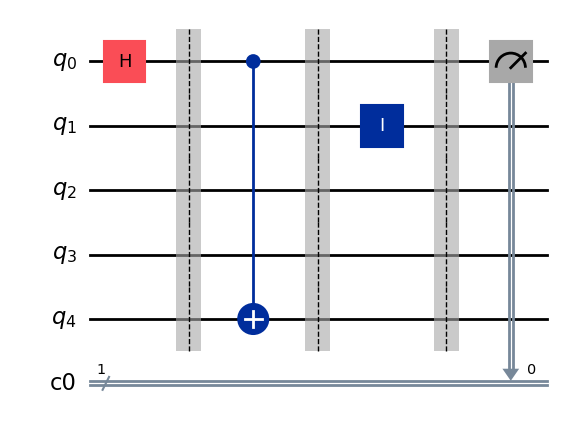

In [20]:
from qiskit import QuantumCircuit, ClassicalRegister
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import EstimatorV2 as Estimator

# crea la cantidad de qubits
qc = QuantumCircuit(5)

# agrega a 0 harmandard gate
qc.h(0)
qc.barrier()
# genera un control x en 0 y 4
qc.cx(0,4)
qc.barrier()
# agrega la identidad a 1
qc.id(1)
# agrega barrera a x 
qc.barrier()
# colocar medidas
creg_c = ClassicalRegister(1)
qc.add_register(creg_c)
qc.measure(0,creg_c[0])


# plot the circuit
qc.draw("mpl")

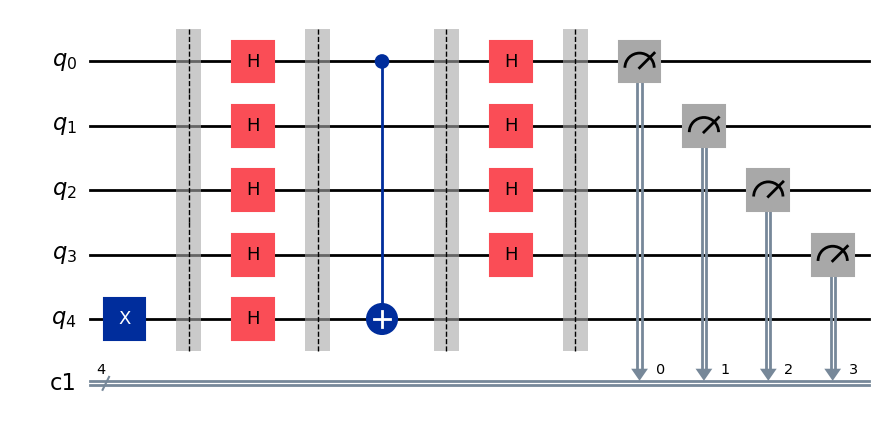

In [21]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import EstimatorV2 as Estimator

qc = QuantumCircuit(5)

qc.x(4)
qc.barrier()

for i in range (5):
    qc.h(i)
qc.barrier()

qc.cx(0,4)
qc.barrier()

for i in range (4):
    qc.h(i)
qc.barrier()

creg_c = ClassicalRegister(4)
qc.add_register(creg_c)
qc.measure(0,creg_c[0])
qc.measure(1,creg_c[1])
qc.measure(2,creg_c[2])
qc.measure(3,creg_c[3])

qc.draw("mpl")

In [2]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
# Use Aer's qasm_simulator
simulator = Aer.get_backend('qasm_simulator')
# Create a Quantum Circuit acting on the q register
circuit = QuantumCircuit(2, 2)
# Add a H gate on qubit 0
circuit.h(0)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 1
circuit.cx(0, 1)
# Map the quantum measurement to the classical bits
circuit.measure([0,1], [0,1])
# compile the circuit down to low-level QASM instructions
# supported by the backend (not needed for simple circuits)
compiled_circuit = transpile(circuit, simulator)
# Execute the circuit on the qasm simulator
job = simulator.run(compiled_circuit, shots=1000)
# Grab results from the job
result = job.result()
# Returns counts
counts = result.get_counts(circuit)
print("\nTotal count for 00 and 11 are:",counts)
# Draw the circuit
print(circuit)
# Plot a histogram
plot_histogram(counts)
plt.show()


Total count for 00 and 11 are: {'00': 506, '11': 494}
     ┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 



Total count for 00 and 11 are: {'00': 1000}


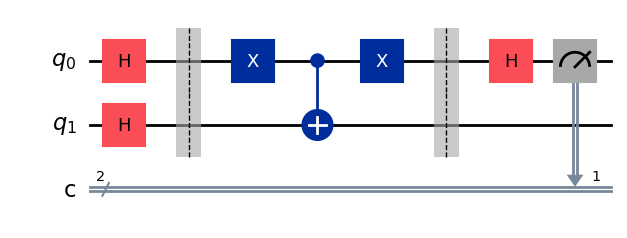

In [31]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

qc = QuantumCircuit(2, 2)

# algotirmo de deutsh
# hadamard gate
qc.h(0)
qc.h(1)
qc.barrier()

# uf
n = int(input("Ingrese el valor de n de funcion de 1 a 4: "))

if n == 1:
    qc.cx(0, 1)
elif n == 2:
    pass
elif n == 3:
    qc.x(1)
elif n == 4:
    qc.x(0)
    qc.cx(0, 1)
    qc.x(0)
else:
    pass

qc.barrier()

qc.h(0)

#
qc.measure(0, 1)

simulator = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=1000)
result = job.result()
counts = result.get_counts(qc)
print("\nTotal count for 00 and 11 are:", counts)

# Plot a histogram
plot_histogram(counts)
plt.show()

qc.draw("mpl")

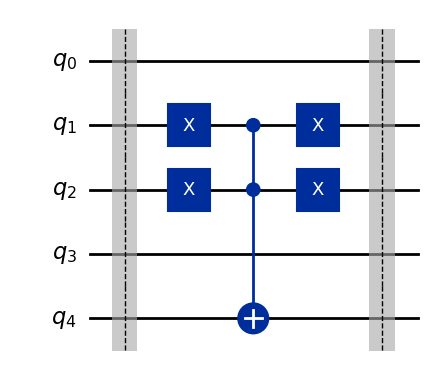

In [11]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

qc = QuantumCircuit(5)

qc.barrier()
qc.x(1)
qc.x(2)
qc.ccx(1, 2, 4)
qc.x(1)
qc.x(2)
qc.barrier()

# plot
qc.draw("mpl")
